# Cross-validation of embedding-based models

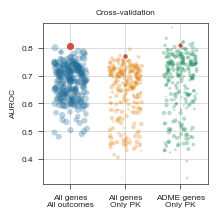

In [57]:
import os
import json
import collections
import numpy as np
import matplotlib.pyplot as plt
import stylia
from stylia.colors.colors import NamedColors

named_colors = NamedColors()
colors = [named_colors.blue, named_colors.orange, named_colors.green]

model_types = ["model_all_outcomes_all_genes", "model_only_pk_all_genes", "model_only_pk_only_adme_genes"]

def load_json(model_folder, fold):
    file = os.path.join(model_folder, "fold_{0}".format(fold), "evaluation.json")
    with open(file, "r") as f:
        return json.load(f)

def load_model_data(model_type):
    model_folder = "../models/models_pairs/{0}".format(model_type)
    folds = [i for i in range(5)]
    aurocs = collections.defaultdict(list)
    n_evals = collections.defaultdict(list)
    for fold in folds:
        data = load_json(model_folder, fold)
        for k,v in data.items():
            aurocs[k] += [v["auroc"]]
            n_evals[k] += [v["n_eval"]]
    values = []
    for k,v in data.items():
        values += [(k, np.mean(v["auroc"]), np.mean(v["n_eval"]))]
    return values

def performance_swarmplot(ax, i):
    def sizer(x):
        return np.sqrt(x)/4
    model_type = model_types[i]
    values = load_model_data(model_type)
    for v in values:
        if v[0] == "weighted_average":
            wa = v
    values = [v for v in values if v[0] != "weighted_average" and v[0] != "average"]
    x = [i]*len(values)
    x = np.array([i]*len(values)) + np.random.uniform(-0.3, 0.3, len(values))
    y = np.array([v[1] for v in values])
    z = np.array([sizer(v[2]) for v in values])
    ax.scatter(x, y, s=z, color=colors[i], alpha=0.3, lw=0)
    ax.scatter(i, wa[1], color=named_colors.red, s=sizer(wa[2]), lw=0)

fig, axs = stylia.create_figure(1, 1, width=stylia.TWO_COLUMNS_WIDTH*0.3, height=stylia.TWO_COLUMNS_WIDTH*0.3)
ax = axs.next()
names = ["All genes\nAll outcomes", "All genes\nOnly PK", "ADME genes\nOnly PK"]
for i, n in enumerate(names):
    performance_swarmplot(ax, i)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(names)
ax.set_ylim(0.31, 0.89)
ax.set_xlim(-0.5, 2.5)
stylia.label(ax, title="Cross-validation", ylabel="AUROC", xlabel="")
plt.tight_layout()

stylia.save_figure("assets/cross_validation_performance.png")


In [11]:
values

[('ersilia---esm1b', 0.7216294452626981, 11464.0),
 ('ersilia---uniprot', 0.6784358888809157, 11447.0),
 ('ersilia---GEN-pdf-TIS--hpa_proteome', 0.629248319389598, 6496.0),
 ('ersilia---GEN-ass-PWY--reactome', 0.7385674886624587, 10072.0),
 ('ersilia---GEN-cex-GEN--coexpressdb', 0.6832447829260767, 10110.0),
 ('ersilia---GEN-has-DOM--interpro', 0.6812153187329317, 7889.0),
 ('ersilia---GEN-pab-TIS--hpa_proteome', 0.6513498352072936, 5508.0),
 ('ersilia---GEN-has-MFN--gomf_goa_curated', 0.7086230630835186, 10369.0),
 ('ersilia---GEN-upr-CLL--gdsc1000_mrna', 0.6556019915128148, 7368.0),
 ('ersilia---GEN-ppi-GEN--hi_union', 0.5798167729749815, 4357.0),
 ('ersilia---GEN-ppi-GEN--string', 0.7471687694685718, 11016.0),
 ('ersilia---GEN-ass-DIS--opentargets', 0.7119345596724833, 10624.0),
 ('ersilia---GEN-ass-DIS--disgenet_curated', 0.7185951532189703, 9548.0),
 ('ersilia---GEN-has-CMP--jensencompartmentcurated',
  0.6875240254012023,
  11089.0),
 ('signaturizer---esm1b', 0.7508360795598812, 